In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# for gpu: 
1) check for gpu 
2) move the model to gpu 
3) modify the training loop to move data to gpu 
4) modify the evaluation loop to move data to gpu 

In [3]:
#check for gpu 
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}")

Using device cuda


In [4]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [5]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [6]:
df.shape

(6000, 785)

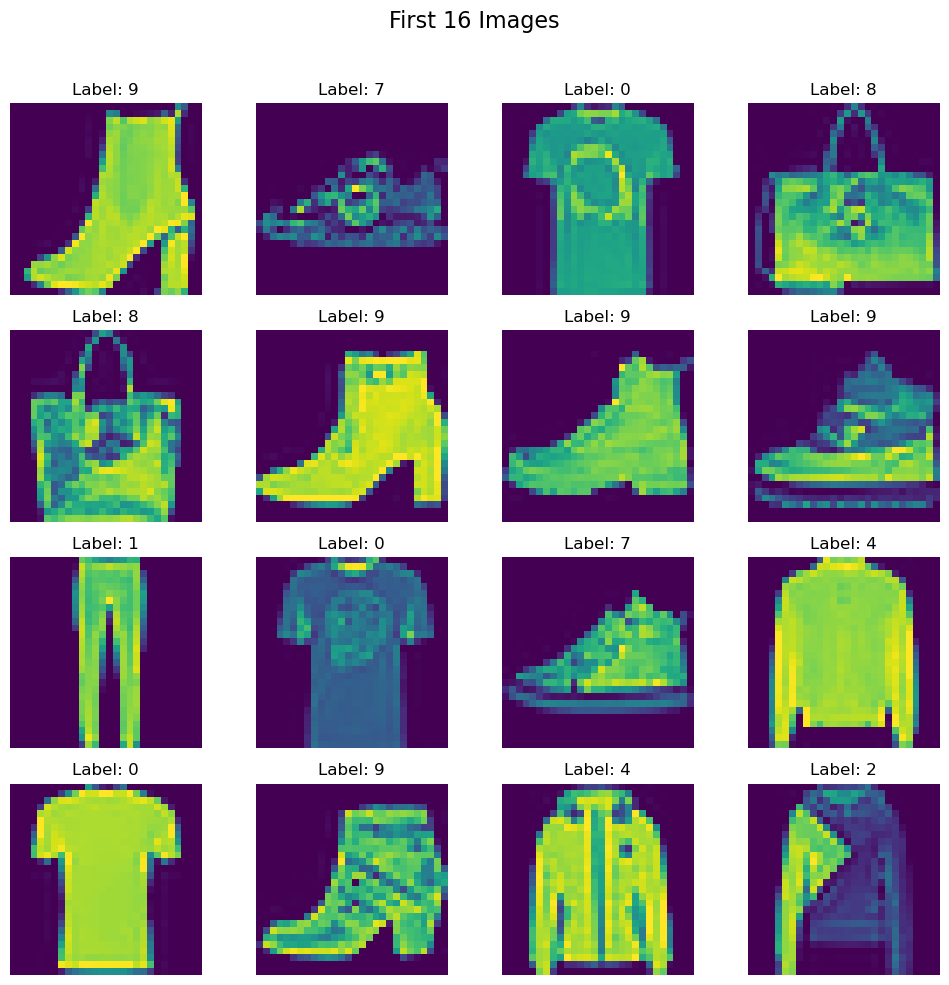

In [7]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [8]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# torch.tensor(y_train).unique()   # no of classes 10:  multiclass classifcations

In [11]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [13]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]



In [14]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [15]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [16]:
# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [17]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False,pin_memory=True)

In [18]:
# define NN class

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.5),  # reducing overfitting 
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(64, 10)
    )

  def forward(self, x):

    return self.model(x)

In [19]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [20]:
# instatiate the model
model = MyNN(X_train.shape[1])
model= model.to(device)

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate , weight_decay=1e-3)  #weight decay is our l2 regularization in optimizer instead of loss 

In [21]:
len(train_loader)

150

In [22]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # moving to gpu 
    batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 1.1595390323797863
Epoch: 2 , Loss: 0.8542468138535817
Epoch: 3 , Loss: 0.7854394946495692
Epoch: 4 , Loss: 0.7338963166872661
Epoch: 5 , Loss: 0.6863973846038183
Epoch: 6 , Loss: 0.6681104761362076
Epoch: 7 , Loss: 0.6453650917609532
Epoch: 8 , Loss: 0.6357878828048706
Epoch: 9 , Loss: 0.5846098744869233
Epoch: 10 , Loss: 0.602382443745931
Epoch: 11 , Loss: 0.5798814425865809
Epoch: 12 , Loss: 0.5573394954204559
Epoch: 13 , Loss: 0.5825313401222229
Epoch: 14 , Loss: 0.53558245241642
Epoch: 15 , Loss: 0.5438722252845765
Epoch: 16 , Loss: 0.5177104637026787
Epoch: 17 , Loss: 0.4935456001758575
Epoch: 18 , Loss: 0.5230636296669642
Epoch: 19 , Loss: 0.5018008043368657
Epoch: 20 , Loss: 0.4925473091006279
Epoch: 21 , Loss: 0.4986359154184659
Epoch: 22 , Loss: 0.4916549704472224
Epoch: 23 , Loss: 0.4631114372611046
Epoch: 24 , Loss: 0.48442941655715305
Epoch: 25 , Loss: 0.4827986980477969
Epoch: 26 , Loss: 0.44887088467677433
Epoch: 27 , Loss: 0.46401397079229356
Epoch: 28 

In [23]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [24]:
# evaluation code for testing 
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # moving to gpu 
    batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)
    
    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1) 

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.8316666666666667


torch.max(outputs, 1) finds the index of the maximum value along dimension 1 (which corresponds to class probabilities).
The _ ignores the actual max value (logit), and predicted stores the class index with the highest probability.

In [25]:
# evaluation code for training 
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # moving to gpu 
    batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)
    
    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1) 

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.9560416666666667


# There's a problem 

# You can clearly see that the training accuracy is 99% while testing accuracy is 83% means overfitting 

# now we will reduce overfitting and optimize the network 

# solution :
1) adding more data 
2) reducing the complexity of NN architecture 
3) regularization 
4) dropouts 
5) data augmentation 
6) bacth normalization 
7) Early stopping 

# here we will implement 
1) regularization 
2) dropout 
3) batch normalization 

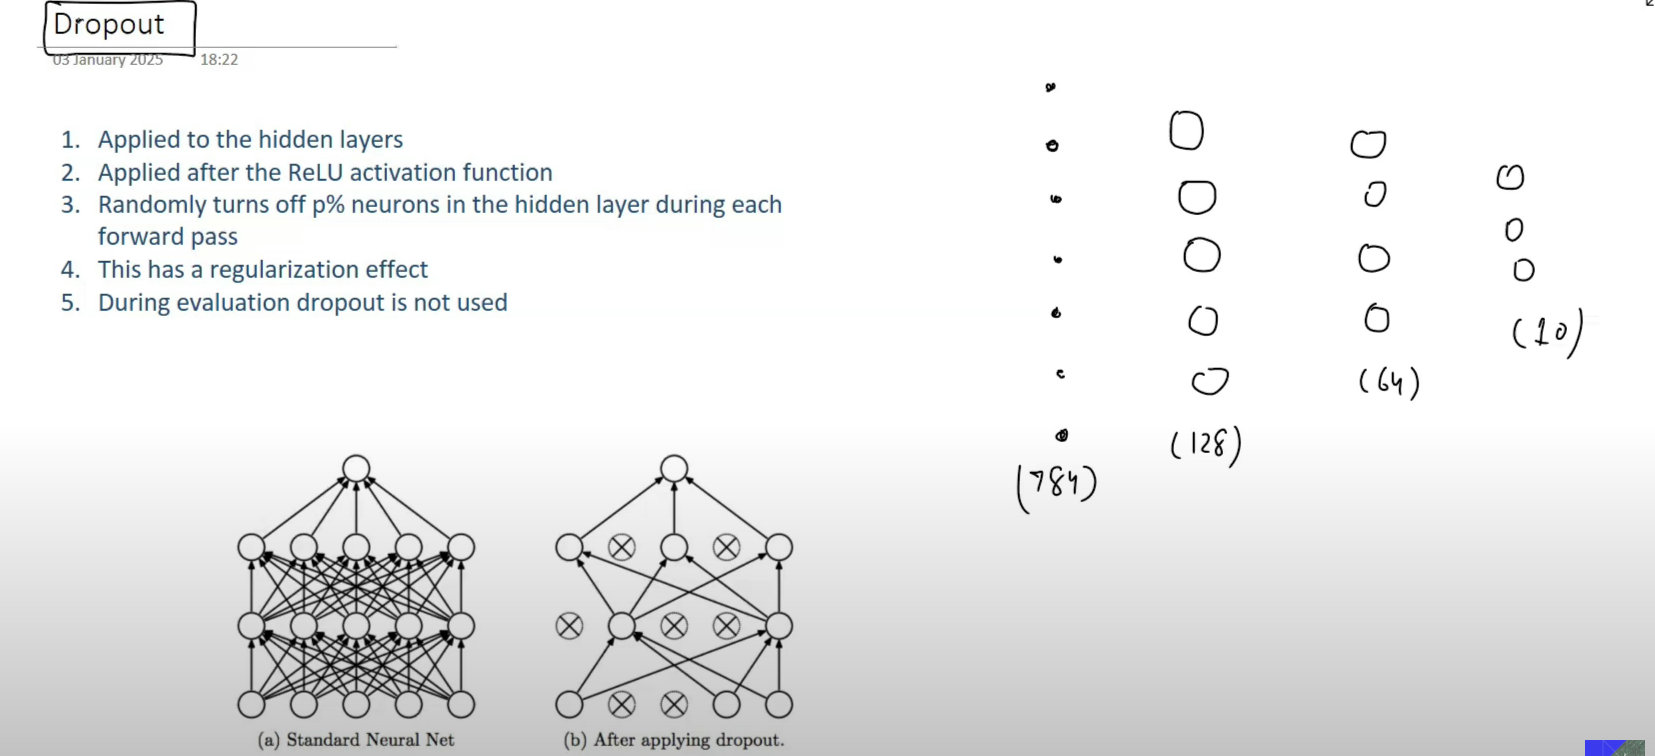

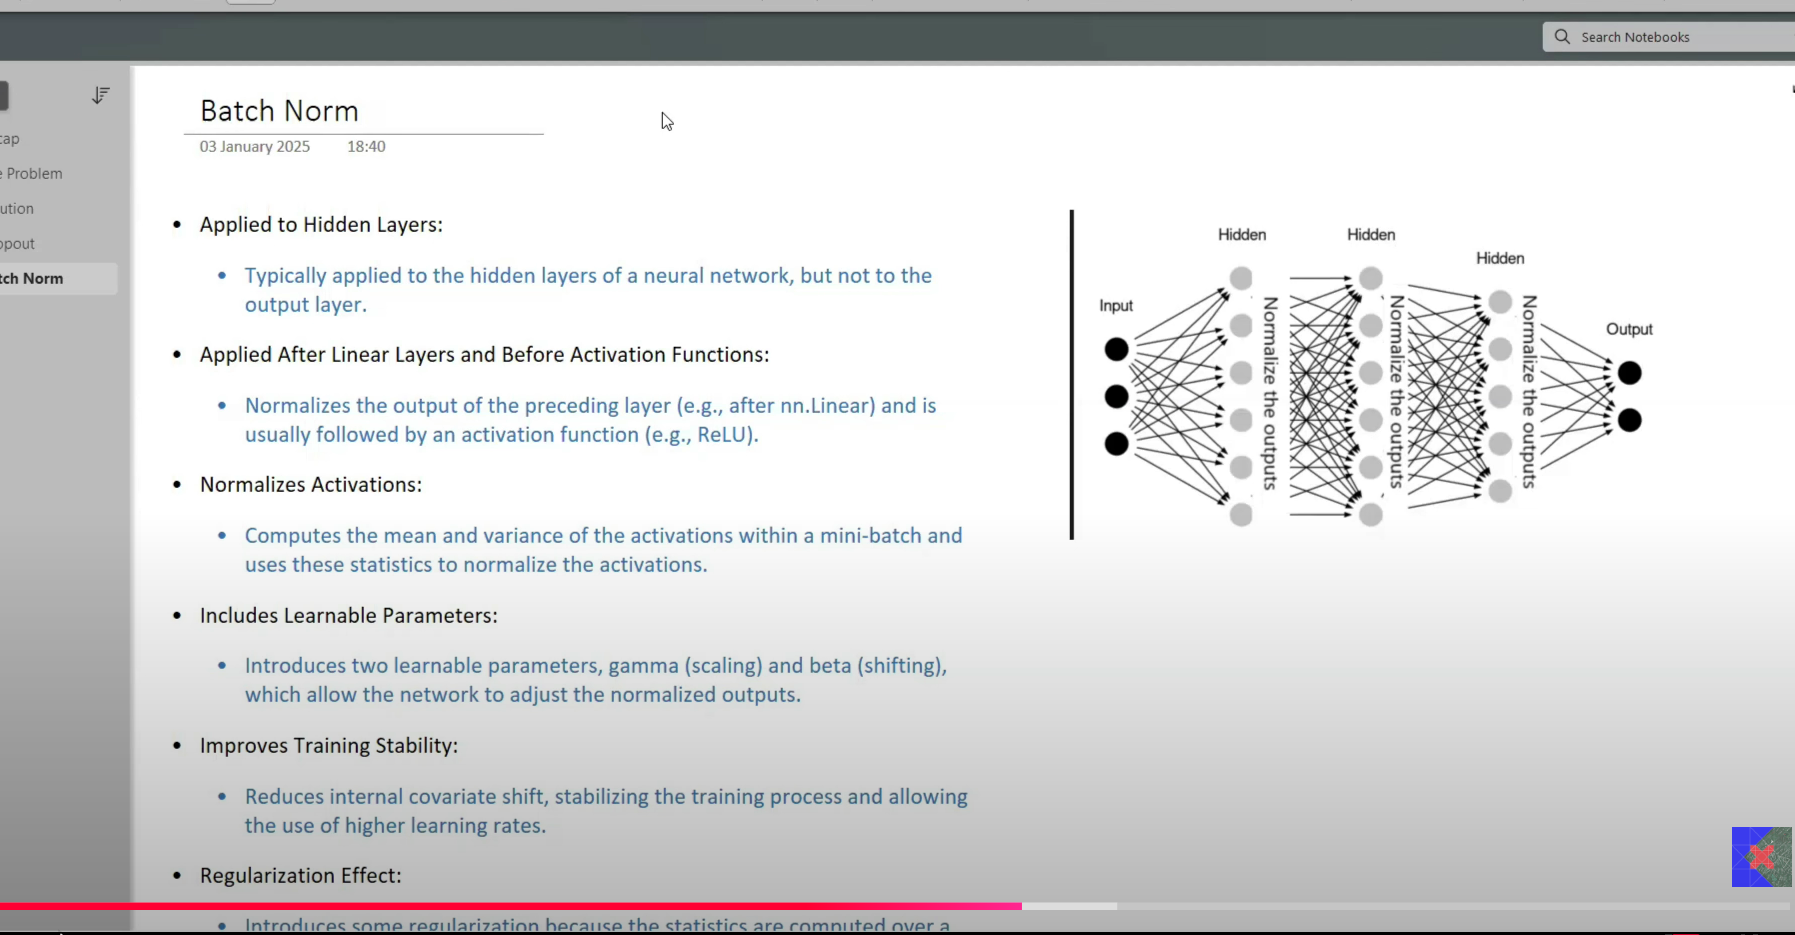

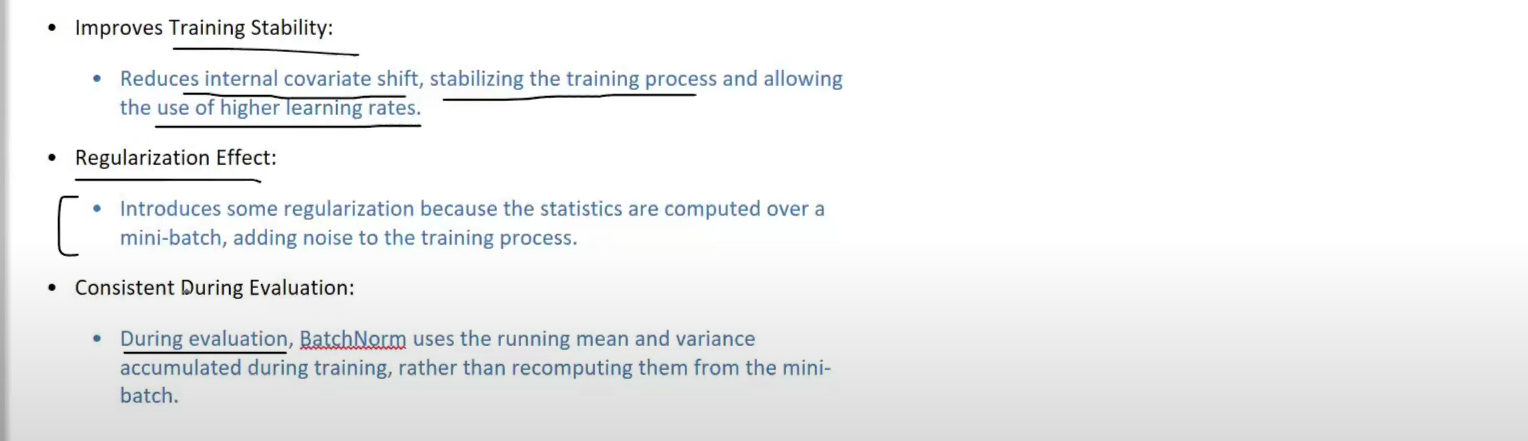

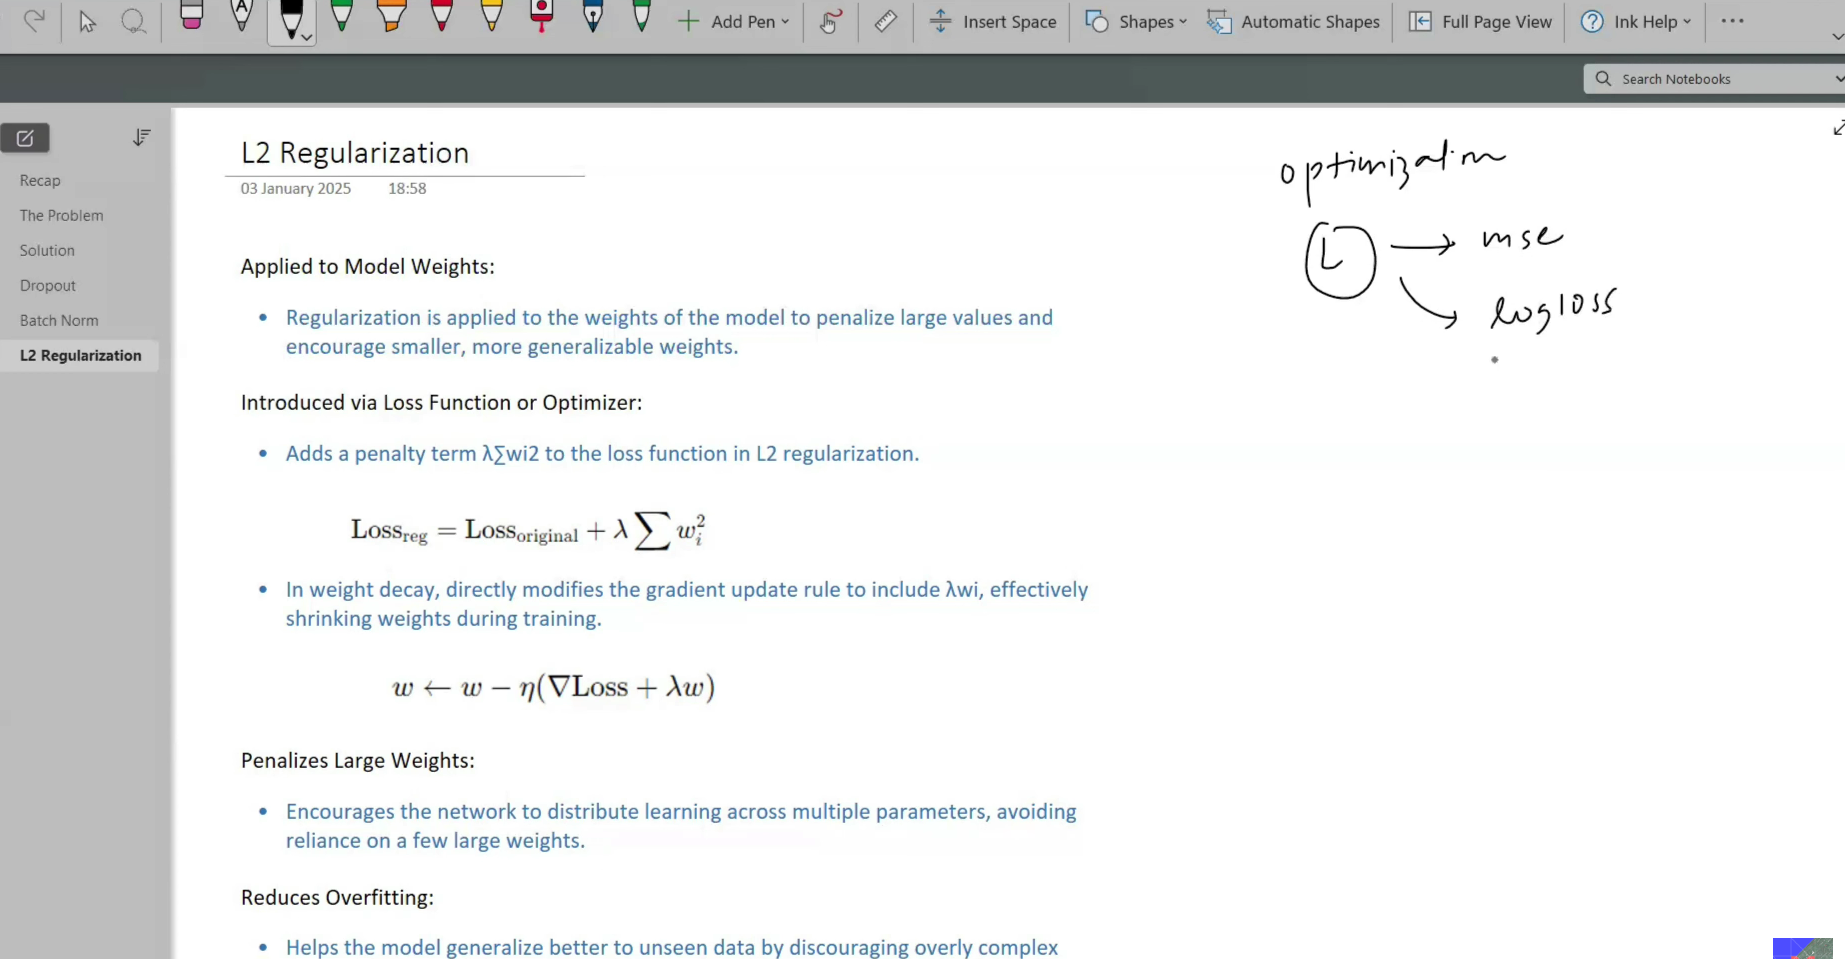

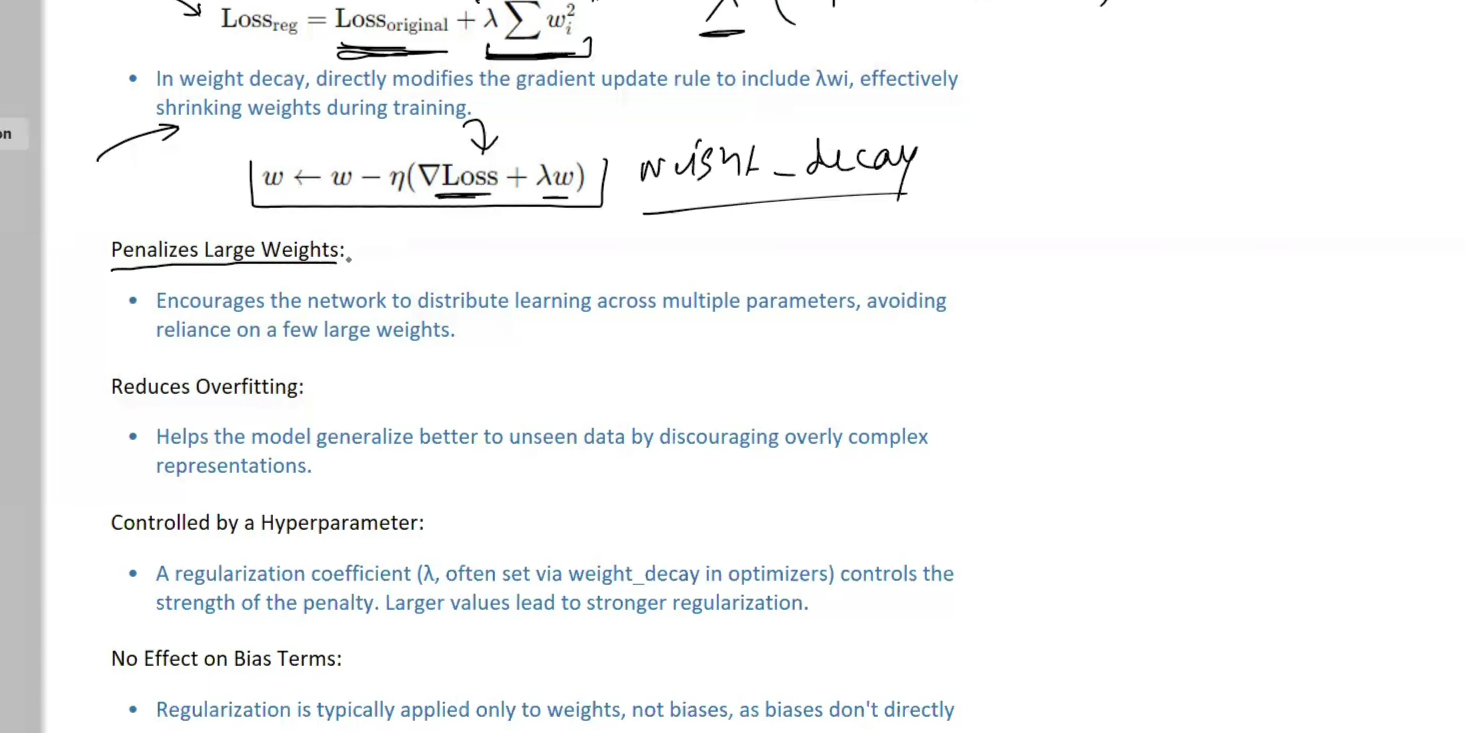

# Now we will find best hyperparameters using optuna 
1) Number of hidden layers 
2) neurons per layer 
3) number of epochs 
4) optimizer 
5) learning rate 
6) batch size 
7) dropout rate 
8) weight decay 